In [24]:
import time
import datetime
from epics import caget, caput
import matplotlib.pyplot as plt

from image import Image
from beam_io import saveimage

from IPython.display import clear_output

In [39]:
#caput("OTRS:IN20:571:ROI_XNP_SET", 19)

1

In [29]:
#caput("OTRS:IN20:571:ROI_YNP_SET", 140)

1

In [41]:
nrow = caget("OTRS:IN20:571:ROI_XNP")
ncol = caget("OTRS:IN20:571:ROI_YNP")
# nrow = caget("OTRS:IN20:571:N_ROW")
# ncol = caget("OTRS:IN20:571:N_COL")
ncol, nrow

(1040, 1392)

(1040, 1392)


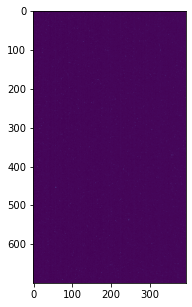

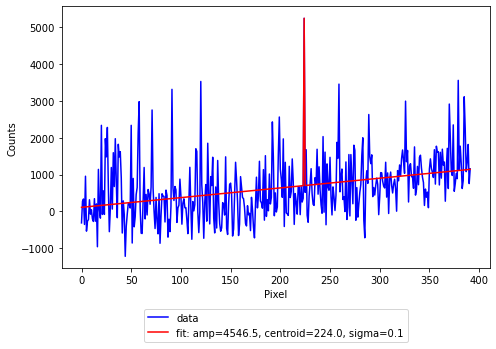

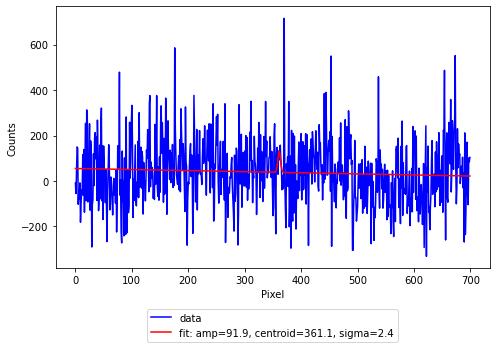

In [62]:
while True:
    im = caget("OTRS:IN20:571:IMAGE")
    beam_image = Image(im, ncol, nrow, bg_image = None) 
    beam_image.reshape_im()
    #print(beam_image.proc_image.shape)
    beam_image.proc_image = beam_image.proc_image[200:900, 1000:]
    plt.figure(figsize = (15,5))
    plt.imshow(beam_image.proc_image)
    beam_image.get_im_projection();
    beamsizes = beam_image.get_sizes(show_plots=True)
    saveimage(im, ncol, nrow, beamsizes)
    plt.close()

    time.sleep(3)
    clear_output(wait=True)
    break

In [14]:
caget("OTRS:IN20:571:XRMS"),caget("OTRS:IN20:571:YRMS")

(24.38231508150023, 1166.02494015097)